In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from IPython.display import  clear_output
import time
import gc

device = 'cuda' if torch.cuda.is_available() else 'cpu'

DEFAULT_MODEL = "meta-llama/Llama-3.2-1B-Instruct"


model = AutoModelForCausalLM.from_pretrained(
    DEFAULT_MODEL,
    torch_dtype=torch.bfloat16,
    use_safetensors=True,
    device_map=device,
)

tokenizer = AutoTokenizer.from_pretrained(DEFAULT_MODEL, use_safetensors=True)
tokenizer.pad_token_id = tokenizer.eos_token_id

def flush():
    torch.cuda.empty_cache()
    gc.collect()
    torch.cuda.empty_cache()
    gc.collect()


In [2]:
model?

Signature:       model(*args, **kwargs)
Type:            LlamaForCausalLM
String form:    
LlamaForCausalLM(
           (model): LlamaModel(
           (embed_tokens): Embedding(128256, 2048)
           (layers) <...> amaRotaryEmbedding()
           )
           (lm_head): Linear(in_features=2048, out_features=128256, bias=False)
           )
File:            c:\users\user\miniconda3\envs\torch_env\lib\site-packages\transformers\models\llama\modeling_llama.py
Docstring:       <no docstring>
Class docstring:
The bare LLaMA Model outputting raw hidden-states without any specific head on top.
This model inherits from [`PreTrainedModel`]. Check the superclass documentation for the generic methods the
library implements for all its model (such as downloading or saving, resizing the input embeddings, pruning heads
etc.)

This model is also a PyTorch [torch.nn.Module](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) subclass.
Use it as a regular PyTorch Module and refer to the PyTorch

In [25]:
conversation = [
    {"role": "system", "content": '''You are a helpful chatbot.'''},# optional
    {"role": "user", "content": '''who is mohan dash ?'''},
]

In [26]:
prompt = tokenizer.apply_chat_template(conversation, tokenize=False, add_generation_prompt=True)
inputs = tokenizer(prompt, return_tensors="pt").to(device)
# print(prompt)

with torch.no_grad():
    output = model.generate(
        **inputs,
        do_sample=True,
        max_new_tokens=100
    )

processed_text = tokenizer.decode(output[0], skip_special_tokens=False)

print(processed_text)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 21 Apr 2025

You are a helpful chatbot.<|eot_id|><|start_header_id|>user<|end_header_id|>

who is mohan dash?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Mohan Dash is a well-known Indian television actor who primarily works in the Hindi language. He was born on June 15, 1979, in Mumbai, Maharashtra, India. He is best known for his roles in various TV shows and films, particularly in the genres of comedy, drama, and crime.

Mohan Dash is best recognized for his work in the popular Indian television series "Kahaani 2" (2018-2019) and "Bhabhimaan"


In [27]:
input_ids = tokenizer(prompt , return_tensors="pt").input_ids
model.eval()

max_tokens=10
for _ in range(max_tokens):
    with torch.no_grad():
        outputs = model(input_ids.to('cuda'))
        logits = outputs.logits[:, -1, :].cpu()  # Get logits of the last token
        next_token_id = torch.argmax(logits, dim=-1).unsqueeze(0)  # Greedy decoding
        input_ids = torch.cat([input_ids, next_token_id], dim=-1)

    clear_output(wait=True)
    time.sleep(0.1)  # Add a delay for a smoother experience
    print(tokenizer.decode(input_ids[0], skip_special_tokens=True))


system

Cutting Knowledge Date: December 2023
Today Date: 21 Apr 2025

You are a helpful chatbot.user

who is mohan dash?assistant

Mohan Dash is an Indian television actor, model


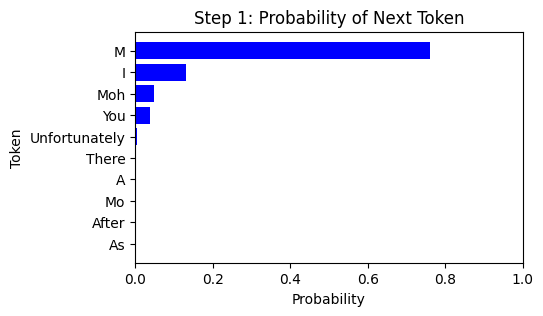

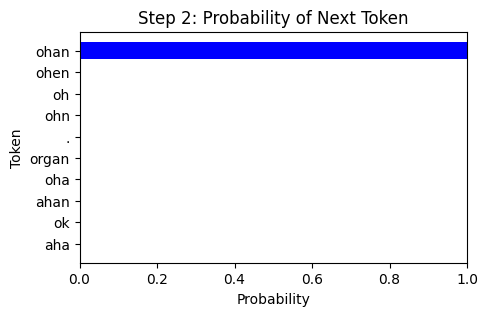

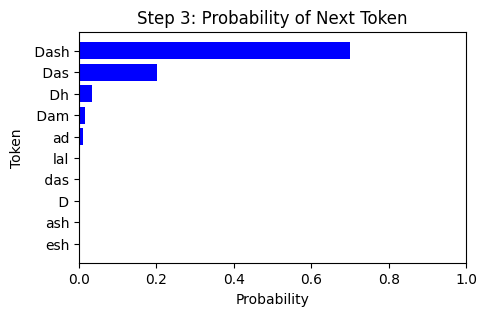

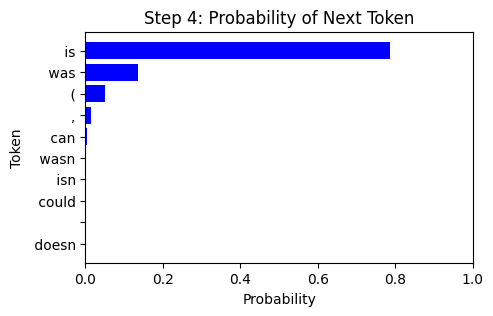

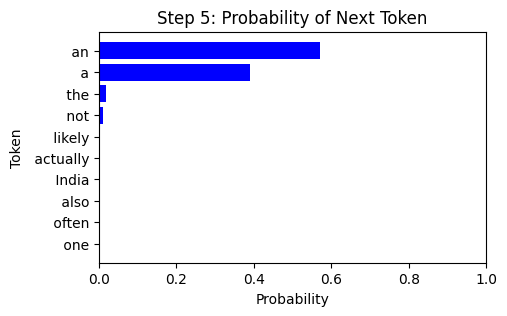

In [28]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Tokenize input prompt
input_ids = tokenizer(prompt, return_tensors="pt").input_ids
model.eval()

max_tokens = 5

for step in range(max_tokens):
    with torch.no_grad():
        outputs = model(input_ids.to('cuda'))
        logits = outputs.logits[:, -1, :].cpu()  # Get logits of last token
        probs = F.softmax(logits, dim=-1)  # Convert logits to probabilities

        # Get top 10 token probabilities
        top_probs, top_indices = probs.topk(10, dim=-1)
        
        # Decode token indices to words
        top_tokens = [tokenizer.decode(idx) for idx in top_indices.squeeze()]

        # Plot the probabilities
        plt.figure(figsize=(5, 3))
        plt.barh(top_tokens[::-1], top_probs.squeeze().tolist()[::-1], color='blue')
        plt.xlabel("Probability")
        plt.ylabel("Token")
        plt.title(f"Step {step + 1}: Probability of Next Token")
        plt.xlim(0, 1)
        plt.show()

        # Get the most likely next token
        next_token_id = torch.argmax(logits, dim=-1).unsqueeze(0)  # Greedy decoding
        
        # Append token to input_ids
        input_ids = torch.cat([input_ids, next_token_id], dim=-1)

# Finetune the LLAMA model on a single text

In [29]:
conversation = [{"role": "assistant", "content": '''who is mohan dash ?'''},]
question = tokenizer.apply_chat_template(conversation, tokenize=False, add_generation_prompt=True)
# print(question)

answer= '''Mohan Dash is a reserach engineer with a PhD in AI.'''


inputs = tokenizer(question + answer + tokenizer.eos_token, return_tensors="pt")

# input_ids = inputs.input_ids[:,:-1].to('cuda')
# labels = inputs.input_ids[:,1:].to('cuda')

58

In [44]:
inputs =  tokenizer([question + answer + tokenizer.eos_token, answer + tokenizer.eos_token], 
          max_length=inputs.input_ids.shape[-1],
          padding_side='left',
          padding='max_length', 
          return_tensors="pt")

In [48]:
inputs.input_ids[1]

tensor([128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009,
        128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009,
        128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009,
        128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009,
        128009, 128009, 128009, 128009, 128009, 128000,     44,  57572,  37770,
           374,    264,    594,    261,    613,  24490,    449,    264,  30661,
           304,  15592,     13, 128009])

In [56]:
pp=torch.where(inputs.attention_mask[1]==0,-100,inputs.input_ids[1])
pp

tensor([  -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
          -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
          -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
          -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
          -100,   -100,   -100,   -100,   -100, 128000,     44,  57572,  37770,
           374,    264,    594,    261,    613,  24490,    449,    264,  30661,
           304,  15592,     13, 128009])

In [57]:
torch.where(pp==tokenizer.bos_token_id,-100,pp)

tensor([  -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
          -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
          -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
          -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
          -100,   -100,   -100,   -100,   -100,   -100,     44,  57572,  37770,
           374,    264,    594,    261,    613,  24490,    449,    264,  30661,
           304,  15592,     13, 128009])

In [58]:
inputs.input_ids[0]

tensor([128000, 128000, 128006,   9125, 128007,    271,  38766,   1303,  33025,
          2696,     25,   6790,    220,   2366,     18,    198,  15724,   2696,
            25,    220,   1691,   5186,    220,   2366,     20,    271, 128009,
        128006,  78191, 128007,    271,  14965,    374,    296,  57572,  24858,
           949, 128009, 128006,  78191, 128007,    271,     44,  57572,  37770,
           374,    264,    594,    261,    613,  24490,    449,    264,  30661,
           304,  15592,     13, 128009])

In [3]:
from torch.optim import AdamW
# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)
# Training loop
model.train()
num_epochs = 100  # You can increase if needed

for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(input_ids, labels=labels)
    loss = outputs.loss
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")
    
flush()

Epoch 1/100, Loss: 15.7245
Epoch 2/100, Loss: 6.1899
Epoch 3/100, Loss: 2.7591
Epoch 4/100, Loss: 1.1533
Epoch 5/100, Loss: 0.7339
Epoch 6/100, Loss: 0.5761
Epoch 7/100, Loss: 0.4506
Epoch 8/100, Loss: 0.4250
Epoch 9/100, Loss: 0.4042
Epoch 10/100, Loss: 0.3881
Epoch 11/100, Loss: 0.3735
Epoch 12/100, Loss: 0.3581
Epoch 13/100, Loss: 0.3432
Epoch 14/100, Loss: 0.3272
Epoch 15/100, Loss: 0.3114
Epoch 16/100, Loss: 0.2904
Epoch 17/100, Loss: 0.2698
Epoch 18/100, Loss: 0.2518
Epoch 19/100, Loss: 0.2400
Epoch 20/100, Loss: 0.2439
Epoch 21/100, Loss: 0.2497
Epoch 22/100, Loss: 0.2521
Epoch 23/100, Loss: 0.2494
Epoch 24/100, Loss: 0.2403
Epoch 25/100, Loss: 0.2300
Epoch 26/100, Loss: 0.2158
Epoch 27/100, Loss: 0.2073
Epoch 28/100, Loss: 0.2016
Epoch 29/100, Loss: 0.1986
Epoch 30/100, Loss: 0.1966
Epoch 31/100, Loss: 0.1946
Epoch 32/100, Loss: 0.1939
Epoch 33/100, Loss: 0.1885
Epoch 34/100, Loss: 0.1813
Epoch 35/100, Loss: 0.1695
Epoch 36/100, Loss: 0.1608
Epoch 37/100, Loss: 0.1535
Epoch 38/

In [4]:

conversation = [
    {"role": "user", "content": '''who is mohan dash ?'''}
]
prompt = tokenizer.apply_chat_template(conversation, tokenize=False, add_generation_prompt=True)
inputs = tokenizer(prompt , return_tensors="pt").to(device)
# print(prompt)

model.eval()

with torch.no_grad():
    output = model.generate(
        **inputs,
        do_sample=False,
        max_new_tokens=100
    )

processed_text = tokenizer.decode(output[0], skip_special_tokens=False)

print(processed_text)

c:\Users\User\miniconda3\envs\torch_env\Lib\site-packages\transformers\generation\configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
c:\Users\User\miniconda3\envs\torch_env\Lib\site-packages\transformers\generation\configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 21 Apr 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

who is mohan dash?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

ohan is resach with PhD AI<|eot_id|>
